In [1]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from pprint import pprint

#file locations
#data file
csv_file_2004 ="CENSUS_and_POPULATION_FINAL_2004.csv"

##NOTES###
#this dataset doesn't include Alaska,all counties were removed bc county names didn't match**
##Lousiana, also**
##It DOES include DC, and counts it as a state**





In [2]:
#read CSV files
analysis_data_2004= pd.read_csv(csv_file_2004)

In [5]:
analysis_data_2004["Avg_Turnout"] = (analysis_data_2004.Total_Votes / analysis_data_2004.County_Pop_2004)
analysis_data_2004

,County,State,State_Code,Location,Year,Party,Candidate,Candidate_Votes,Total_Votes,County_Pop_2004,Avg_Turnout
0,Autauga,Alabama,AL,"Alabama, Autauga",2004,democrat,John Kerry,4758.0,20081,48366,0.415188
1,Autauga,Alabama,AL,"Alabama, Autauga",2004,republican,George W. Bush,15196.0,20081,48366,0.415188
2,Baldwin,Alabama,AL,"Alabama, Baldwin",2004,democrat,John Kerry,15599.0,69320,156266,0.443603
3,Baldwin,Alabama,AL,"Alabama, Baldwin",2004,republican,George W. Bush,52971.0,69320,156266,0.443603
4,Barbour,Alabama,AL,"Alabama, Barbour",2004,democrat,John Kerry,4832.0,10777,28287,0.380988
...,...,...,...,...,...,...,...,...,...,...,...
6067,Uinta,Wyoming,WY,"Wyoming, Uinta",2004,republican,George W. Bush,6081.0,8081,19470,0.415049
6068,Washakie,Wyoming,WY,"Wyoming, Washakie",2004,democrat,John Kerry,855.0,4114,7960,0.516834
6069,Washakie,Wyoming,WY,"Wyoming, Washakie",2004,republican,George W. Bush,3200.0,4114,7960,0.516834
6070,Weston,Wyoming,WY,"Wyoming, Weston",2004,democrat,John Kerry,580.0,3392,6646,0.510382


In [10]:
# 1. What is the overall average voter turnout for 2004 per (((state))), and per county
State_Avg_Turnout = round((analysis_data_2004.groupby('State_Code')['Avg_Turnout'].mean() * 100), 2)

State_Avg_Voter_Turnout = pd.DataFrame(State_Avg_Turnout)
State_Avg_Voter_Turnout_1 = State_Avg_Voter_Turnout.reset_index()
State_Avg_Voter_Turnout_1


,State_Code,Avg_Turnout
0,AL,41.65
1,AR,38.24
2,AZ,34.53
3,CA,39.37
4,CO,50.24
5,CT,46.48
6,DC,40.09
7,DE,43.92
8,FL,45.28
9,GA,36.49


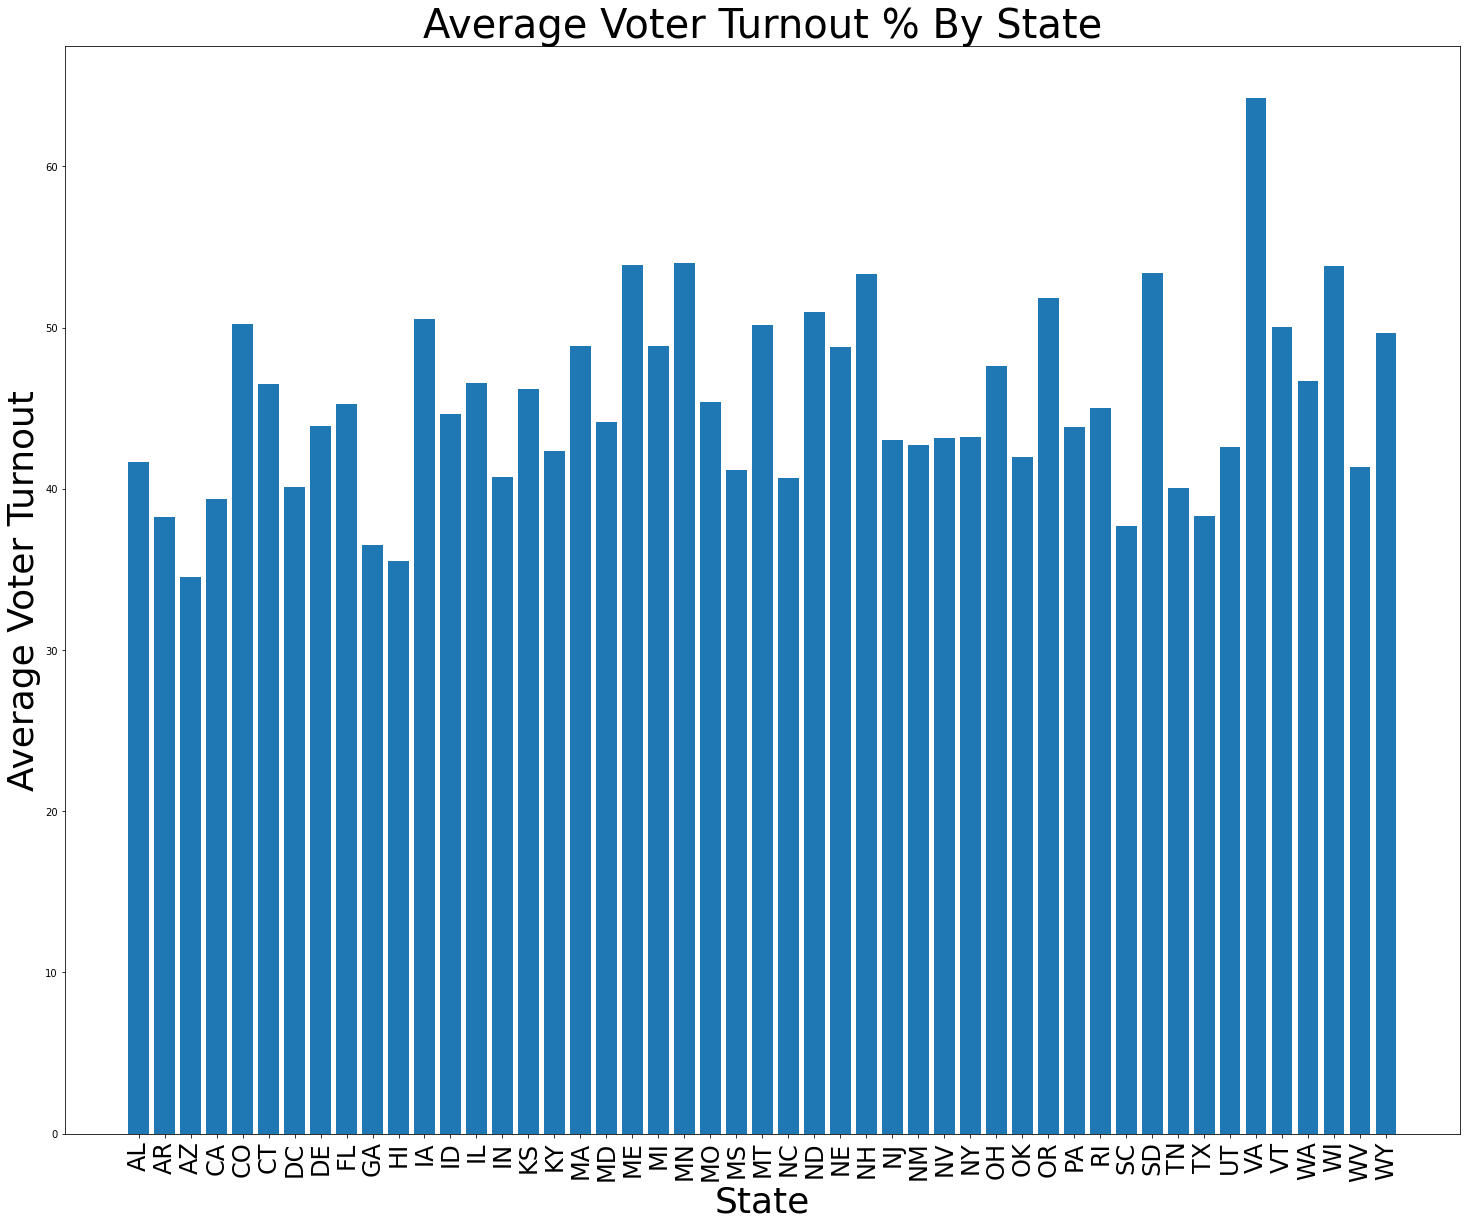

In [32]:
#Bar Graph

Avg_Turnout = State_Avg_Voter_Turnout_1["Avg_Turnout"]
State =  State_Avg_Voter_Turnout_1["State_Code"]
plt.bar(State, Avg_Turnout)
plt.title('Average Voter Turnout % By State', fontsize=40)
plt.xlabel('State', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=24)
plt.rcParams["figure.figsize"] = [20, 20]

plt.show()

In [33]:
# 1. What is the overall average voter turnout for 2004 per state, and per (((county)))
County_Avg_Turnout = round((analysis_data_2004.groupby('Location')['Avg_Turnout'].mean() * 100), 2)
County_Avg_Turnout

County_Avg_Voter_Turnout = pd.DataFrame(County_Avg_Turnout)
County_Avg_Voter_Turnout_1 = County_Avg_Voter_Turnout.reset_index()
County_Avg_Voter_Turnout_1

,Location,Avg_Turnout
0,"Alabama, Autauga",41.52
1,"Alabama, Baldwin",44.36
2,"Alabama, Barbour",38.10
3,"Alabama, Bibb",34.99
4,"Alabama, Blount",39.73
...,...,...
2996,"Wyoming, Sweetwater",42.79
2997,"Wyoming, Teton",58.35
2998,"Wyoming, Uinta",41.50
2999,"Wyoming, Washakie",51.68


In [34]:
Sample_County = County_Avg_Voter_Turnout_1.sample(n = 50)
Sample_County

,Location,Avg_Turnout
128,"Arkansas, Mississippi",29.62
2995,"Wyoming, Sublette",51.63
1642,"Nebraska, Washington",50.79
2984,"Wyoming, Fremont",46.99
2088,"Oklahoma, Pawnee",42.16
1654,"Nevada, Humboldt",35.99
1312,"Mississippi, Choctaw",42.79
1314,"Mississippi, Clarke",43.41
1533,"Montana, Phillips",50.52
43,"Alabama, Macon",41.47


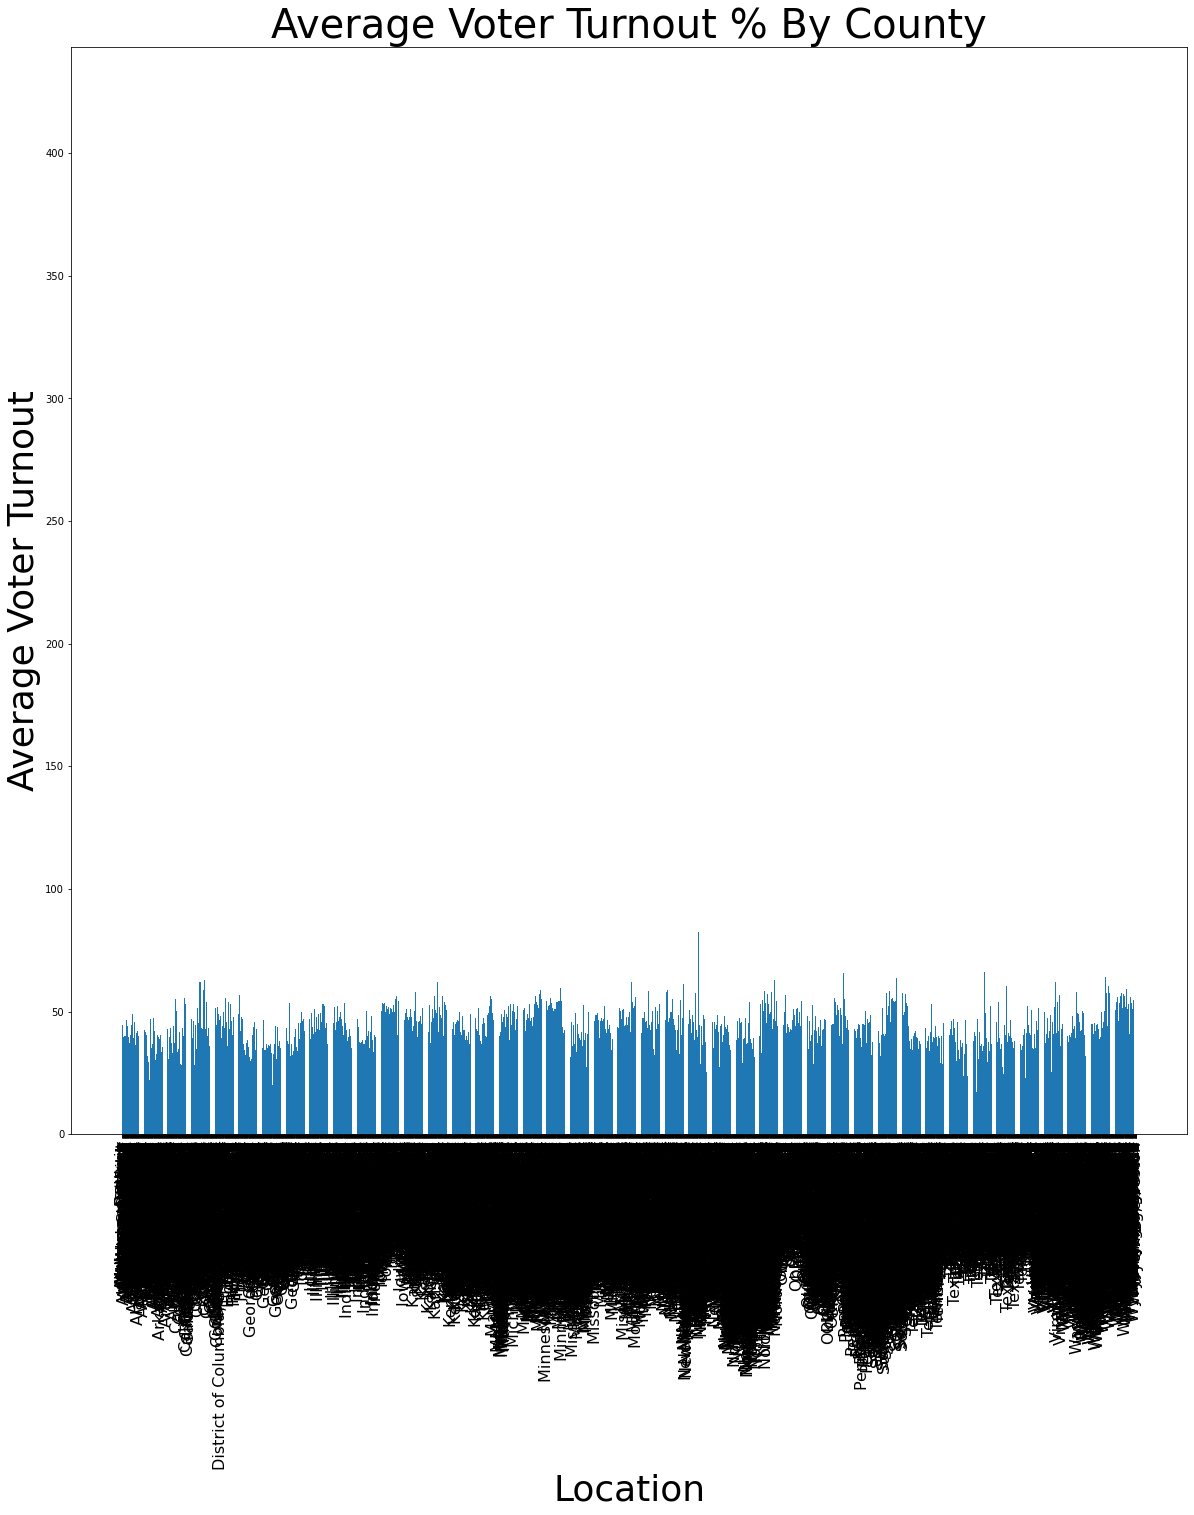

In [35]:
Avg_County_Turnout = County_Avg_Voter_Turnout_1["Avg_Turnout"]
Location =  County_Avg_Voter_Turnout_1["Location"]
plt.bar(Location, Avg_County_Turnout)
plt.title('Sample Average Voter Turnout % By County', fontsize=40)
plt.xlabel('Location', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=16)
plt.rcParams["figure.figsize"] = [100, 20]

plt.show()

In [ ]:
#5. Are there any outliers?


In [ ]:
# 2. Which States have the highest / lowest average voter turnout?
#Line Graph

In [ ]:
# 3. voter turnout vs population
#Stacked Bar Graph

In [ ]:
#4. What is the avg population of the county compared to the voters on election day




In [ ]:
#5. What is the voter turnout based on political party per state, county